In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [11]:
# 读入图片并转成灰度格式
#将image转化成数组格式
name = 'hw4_2_BBH.jpg'
image_array = np.array(Image.open(name).convert("L"))

# 灰度图均衡化

In [12]:
# 算法
def gray2balanced(image_array, bins=256):
    # 数组flatten
    # 返回频数，直方图区间坐标
    hist, bins = np.histogram(image_array.flatten(), bins)
    
    # 利用公式，计算直方图的累积函数
    cdf = hist.cumsum()
    
    # 将累积函数的值转化成像素值  [0,255]
    cdf = 255.0* cdf 
    
    # 利用累积函数值对原图像灰度矩阵 差值，Notice
    balanced_imgarray = np.interp(image_array.flatten(), bins[:256], cdf)
    
    # 返回均衡化后的图像矩阵
    return balanced_imgarray.reshape(image_array.shape)

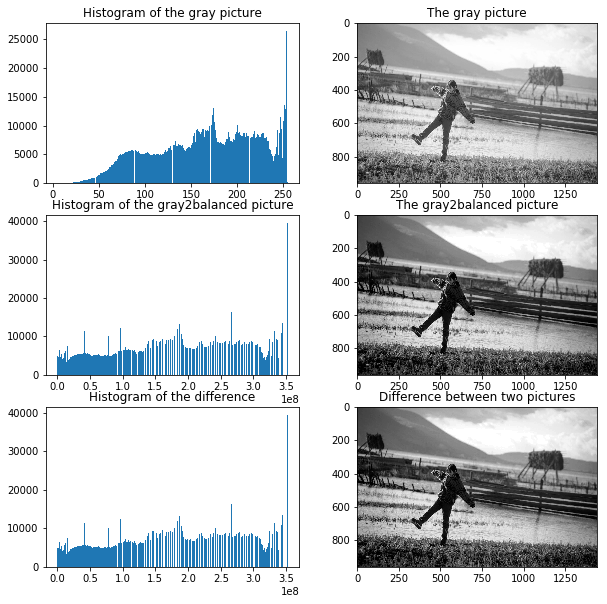

In [13]:
plt.figure(figsize=(10, 10))
# 1-原图的灰度图
plt.subplot(3, 2, 1)
plt.title('Histogram of the gray picture')
plt.hist(image_array.flatten(), 256)

plt.subplot(3, 2, 2)
plt.title('The gray picture')
plt.imshow(image_array, cmap='gray')

# 2-均衡化
gray2balanced_img = gray2balanced(image_array)

plt.subplot(3, 2, 3)
plt.title('Histogram of the gray2balanced picture')
plt.hist(gray2balanced_img.flatten(), 256)

plt.subplot(3, 2, 4)
plt.title('The gray2balanced picture')
plt.imshow(gray2balanced_img, cmap='gray')


# 3-显示对比与原图差别
difference = -image_array + gray2balanced_img  
plt.subplot(3, 2, 5)
plt.title('Histogram of the difference')
plt.hist(difference.flatten(), 256)

plt.subplot(3, 2, 6)
plt.title('Difference between two pictures')
plt.imshow(difference, cmap='gray')

# 保存图片
plt.savefig('2_balance_image.png')